# Assignment 7
# Multi-Class Model Selection using ROC and Precision-Recall Curves

### Jerlin Chellam J
#### DA25C009

## Introduction

In this, I took on the role of a machine learning scientist tasked with classifying different land cover types using satellite image data. The dataset I worked with is the UCI Landsat Satellite dataset, a well-known multi-class classification problem with six distinct classes. What makes this task challenging is its high feature dimensionality and the overlap between classes, which makes it difficult for models to cleanly separate one land type from another.

The main goal of this analysis is to perform model selection and comparing various classifiers to identify which performs best and which struggles under complex decision boundaries. Instead of relying solely on accuracy, I used Receiver Operating Characteristic (ROC) and Precision-Recall (PRC) curves to gain a deeper understanding of model performance across varying thresholds. These visual tools are especially powerful in a multi-class setup, where I applied one-vs-rest averaging to fairly evaluate each model’s ability to distinguish each class.

Through the following codes, explanations, and my observations, we’ll explore how different models handle this challenging dataset and by the end, we’ll clearly see which classifier emerges as the most reliable and which falls behind.

## PART A
### Data Preparation and Baseline

#### Load and Prepare Data

As usual loading the important libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Since the downloaded dataset have separate train and test data, I'm going to combine them and split them later

In [2]:
train_file = "sat.trn"
test_file = "sat.tst"

In [3]:
columns = [f"f{i}" for i in range(36)] + ["label"]

# Loading both text files
df_train = pd.read_csv(train_file, sep=r'\s+', header=None, names=columns)
df_test  = pd.read_csv(test_file,  sep=r'\s+', header=None, names=columns)

print("Train data shape:", df_train.shape)
print("Test data shape:", df_test.shape)

Train data shape: (4435, 37)
Test data shape: (2000, 37)


I'm here storing the combined full dataset as csv file

In [4]:
# Combining both datasets 
df_combined = pd.concat([df_train, df_test], ignore_index=True)

# Saving both the original and combined datasets to csv
df_train.to_csv("landsat_train.csv", index=False)
df_test.to_csv("landsat_test.csv", index=False)
df_combined.to_csv("landsat_full.csv", index=False)

In [5]:
df_combined.head()

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f27,f28,f29,f30,f31,f32,f33,f34,f35,label
0,92,115,120,94,84,102,106,79,84,102,...,104,88,121,128,100,84,107,113,87,3
1,84,102,106,79,84,102,102,83,80,102,...,100,84,107,113,87,84,99,104,79,3
2,84,102,102,83,80,102,102,79,84,94,...,87,84,99,104,79,84,99,104,79,3
3,80,102,102,79,84,94,102,79,80,94,...,79,84,99,104,79,84,103,104,79,3
4,84,94,102,79,80,94,98,76,80,102,...,79,84,103,104,79,79,107,109,87,3


In [6]:
# number of samples per class
print(df_combined['label'].value_counts().sort_index())

label
1    1533
2     703
3    1358
4     626
5     707
7    1508
Name: count, dtype: int64


#### Standardize the features (X), But why we Standardize?
- StandardScaler() subtracts the mean and divides by the standard deviation for each feature.

- After standardization, every feature will have mean = 0 and standard deviation = 1, which helps many ML models perform better.

In [7]:
from sklearn.preprocessing import StandardScaler

# Separating features and labels
X = df_combined.drop('label', axis=1)
y = df_combined['label']

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

print("Features standardized successfully")

Features standardized successfully


Now I'm spliting the data into training and testing sets

In [8]:
from sklearn.model_selection import train_test_split

# Spliting the data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)

Training set size: (5148, 36)
Testing set size: (1287, 36)


## Train All Models
There are 6 models given to train, so now I will train all these model and let's see if I can able reach the Performance Expectation of each model

### 1. K-Nearest Neighbors(KNN)

In [9]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize
knn = KNeighborsClassifier(n_neighbors=5)

# fit
knn.fit(X_train, y_train)

# Predict 
y_pred = knn.predict(X_test)

# Evaluate the model
acc = accuracy_score(y_test, y_pred)
print("KNN Accuracy:", round(acc, 4))

KNN Accuracy: 0.9114


In [10]:
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           1       0.96      0.99      0.97       307
           2       0.98      0.96      0.97       141
           3       0.87      0.96      0.91       272
           4       0.74      0.62      0.68       125
           5       0.95      0.89      0.92       141
           7       0.91      0.89      0.90       301

    accuracy                           0.91      1287
   macro avg       0.90      0.89      0.89      1287
weighted avg       0.91      0.91      0.91      1287


Confusion Matrix:
 [[304   0   3   0   0   0]
 [  0 136   0   1   2   2]
 [  3   1 261   5   0   2]
 [  0   0  28  78   1  18]
 [ 10   2   0   0 126   3]
 [  0   0   8  21   4 268]]


### 2. Decision Tree Classifier

In [11]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)

# Train the model
dt.fit(X_train, y_train)

# Predict 
y_pred_dt = dt.predict(X_test)

# Evaluate the model
acc_dt = accuracy_score(y_test, y_pred_dt)
print("Decision Tree Accuracy:", round(acc_dt, 4))

Decision Tree Accuracy: 0.8469


In [12]:
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))


Classification Report:
               precision    recall  f1-score   support

           1       0.94      0.95      0.95       307
           2       0.96      0.95      0.96       141
           3       0.90      0.89      0.89       272
           4       0.49      0.52      0.50       125
           5       0.83      0.81      0.82       141
           7       0.82      0.81      0.81       301

    accuracy                           0.85      1287
   macro avg       0.82      0.82      0.82      1287
weighted avg       0.85      0.85      0.85      1287


Confusion Matrix:
 [[292   0   5   3   4   3]
 [  1 134   0   1   3   2]
 [  3   1 241  20   1   6]
 [  1   1  20  65   3  35]
 [ 13   3   0   3 114   8]
 [  0   0   3  42  12 244]]


### 3. Dummy Classifier(Prior)
- strategy='prior' -> The classifier always predicts the most frequent class from the training data, ignoring features entirely.

- This gives a baseline performance it helps us see how much better our real models (like KNN and Decision Tree) perform compared to random guessing or class frequency.

- As given the expected AUC < 0.5 for minority classes because it doesn’t actually learn any decision boundaries.

In [13]:
from sklearn.dummy import DummyClassifier

In [14]:
# Initializing Dummy Classifier with 'prior' strategy
dummy = DummyClassifier(strategy='prior')

# Train the model
dummy.fit(X_train, y_train)

# Predict on test data
y_pred_dummy = dummy.predict(X_test)

acc_dummy = accuracy_score(y_test, y_pred_dummy)
print("Dummy Classifier (Prior) Accuracy:", round(acc_dummy, 4))

Dummy Classifier (Prior) Accuracy: 0.2385


In [15]:
print("\nClassification Report:\n", classification_report(y_test, y_pred_dummy, zero_division=0))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_dummy))


Classification Report:
               precision    recall  f1-score   support

           1       0.24      1.00      0.39       307
           2       0.00      0.00      0.00       141
           3       0.00      0.00      0.00       272
           4       0.00      0.00      0.00       125
           5       0.00      0.00      0.00       141
           7       0.00      0.00      0.00       301

    accuracy                           0.24      1287
   macro avg       0.04      0.17      0.06      1287
weighted avg       0.06      0.24      0.09      1287


Confusion Matrix:
 [[307   0   0   0   0   0]
 [141   0   0   0   0   0]
 [272   0   0   0   0   0]
 [125   0   0   0   0   0]
 [141   0   0   0   0   0]
 [301   0   0   0   0   0]]


### 4. Logistic Regression

In [19]:
from sklearn.linear_model import LogisticRegression

# Using 'lbfgs' solver (since it's good for multiclass)
log_reg = LogisticRegression(solver='lbfgs', max_iter=1000, random_state=42)

# Training the model
log_reg.fit(X_train, y_train)

# Prediction
y_pred_log = log_reg.predict(X_test)

acc_log = accuracy_score(y_test, y_pred_log)
print("Logistic Regression Accuracy:", round(acc_log, 4))

Logistic Regression Accuracy: 0.8493


In [20]:
print("\nClassification Report:\n", classification_report(y_test, y_pred_log))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_log))


Classification Report:
               precision    recall  f1-score   support

           1       0.93      0.97      0.95       307
           2       0.98      0.93      0.96       141
           3       0.85      0.94      0.89       272
           4       0.52      0.36      0.42       125
           5       0.83      0.74      0.78       141
           7       0.81      0.86      0.83       301

    accuracy                           0.85      1287
   macro avg       0.82      0.80      0.81      1287
weighted avg       0.84      0.85      0.84      1287


Confusion Matrix:
 [[298   0   9   0   0   0]
 [  1 131   0   0   9   0]
 [  3   0 256  12   0   1]
 [  0   0  31  45   5  44]
 [ 17   2   0   1 105  16]
 [  0   0   6  29   8 258]]


### 5. Naive Bayes(Gaussian)

In [21]:
from sklearn.naive_bayes import GaussianNB

# Initializing
nb = GaussianNB()

nb.fit(X_train, y_train)

# Prediction
y_pred_nb = nb.predict(X_test)

acc_nb = accuracy_score(y_test, y_pred_nb)
print("Naive Bayes (Gaussian) Accuracy:", round(acc_nb, 4))

Naive Bayes (Gaussian) Accuracy: 0.7832


In [22]:
print("\nClassification Report:\n", classification_report(y_test, y_pred_nb))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_nb))


Classification Report:
               precision    recall  f1-score   support

           1       0.89      0.78      0.83       307
           2       1.00      0.90      0.95       141
           3       0.86      0.91      0.88       272
           4       0.46      0.58      0.51       125
           5       0.56      0.72      0.63       141
           7       0.85      0.73      0.78       301

    accuracy                           0.78      1287
   macro avg       0.77      0.77      0.76      1287
weighted avg       0.81      0.78      0.79      1287


Confusion Matrix:
 [[239   0  13   0  55   0]
 [  4 127   0   2   7   1]
 [  4   0 248  19   0   1]
 [  0   0  26  73   3  23]
 [ 22   0   0   2 102  15]
 [  1   0   3  64  14 219]]


### 6. Support Vector Machine(SVM)
- kernel='rbf': default and most widely used that captures non-linear relationships.

- probability=True: enables predict_proba() method that is required for ROC & PRC.

- SVMs can take longer to train, but they’re very powerful and often achieve good accuracy on this dataset.

In [23]:
from sklearn.svm import SVC

# Initializing
svm_model = SVC(kernel='rbf', probability=True, random_state=42)

svm_model.fit(X_train, y_train)

# Prediction
y_pred_svm = svm_model.predict(X_test)

acc_svm = accuracy_score(y_test, y_pred_svm)
print("SVM Accuracy:", round(acc_svm, 4))

SVM Accuracy: 0.8928


In [24]:
print("\nClassification Report:\n", classification_report(y_test, y_pred_svm))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))


Classification Report:
               precision    recall  f1-score   support

           1       0.95      0.99      0.97       307
           2       0.97      0.96      0.97       141
           3       0.86      0.94      0.90       272
           4       0.65      0.60      0.62       125
           5       0.94      0.84      0.89       141
           7       0.90      0.86      0.88       301

    accuracy                           0.89      1287
   macro avg       0.88      0.87      0.87      1287
weighted avg       0.89      0.89      0.89      1287


Confusion Matrix:
 [[304   0   3   0   0   0]
 [  0 136   0   2   2   1]
 [  3   2 257   9   0   1]
 [  0   0  30  75   1  19]
 [ 14   1   0   0 119   7]
 [  0   1   8  30   4 258]]


## Baseline Evaluation

In [28]:
from sklearn.metrics import f1_score

In [29]:
# Combine all trained models
models = [
    ('KNN', knn),
    ('Decision Tree', dt),
    ('Dummy Classifier', dummy),
    ('Logistic Regression', log_reg),
    ('Naive Bayes', nb),
    ('SVM', svm_model)
]

print("Baseline Evaluation Results:\n")
for name, model in models:
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    print(f"{name:22s} | Accuracy: {acc:.4f} | Weighted F1: {f1:.4f}")

Baseline Evaluation Results:

KNN                    | Accuracy: 0.9114 | Weighted F1: 0.9094
Decision Tree          | Accuracy: 0.8469 | Weighted F1: 0.8481
Dummy Classifier       | Accuracy: 0.2385 | Weighted F1: 0.0919
Logistic Regression    | Accuracy: 0.8493 | Weighted F1: 0.8421
Naive Bayes            | Accuracy: 0.7832 | Weighted F1: 0.7901
SVM                    | Accuracy: 0.8928 | Weighted F1: 0.8913


#### Observation
- From the baseline results, I noticed that the <u>"Dummy Classifier performed the worst"</u>, which was expected since it only predicts based on class priors. It's accuracy was very low at 0.2385, and the weighted F1-score was also poor.

- Among the remaining models, Naive Bayes and Decision Tree gave moderate results compared to others.

- Models like <u>"KNN, SVM, and Logistic Regression performed much better"</u>, with KNN showing the highest accuracy and F1-score overall.

- This shows that distance-based models like KNN and SVM are able to capture the class boundaries more effectively for this dataset.

# Part B
## ROC Analysis for Model Selection

### Multi-Class ROC Calculation
- ### Explanation about One-vs-Rest (OvR)
    - From what I understood, the ROC curve is normally used for binary classification to show how well a model separates positive and negative classes by plotting the True Positive Rate (TPR) against the False Positive Rate (FPR) at different thresholds. But since our dataset has six different land cover classes, it becomes a multi-class problem, so we can’t directly plot one single ROC curve.

    - To handle this, I learned that the One-vs-Rest (OvR) approach is commonly used. In this method, each class is treated as the “positive” class while all the remaining classes together form the “negative” group. So, for six classes, six separate binary ROC curves are created — one for each class.

    - For each of these curves, the model calculates the TPR and FPR based on predicted probabilities, and then we find the Area Under the Curve (AUC) for that class. Finally, the AUC values from all classes are averaged (either macro or weighted) to represent the overall ROC performance for the model.

    - I felt this method was quite intuitive because it helps to understand how the model performs for every individual class, not just the overall accuracy. Especially in datasets like Landsat, where some classes might overlap or be harder to separate, this approach gives a much clearer picture of how well the model is distinguishing each land cover type.

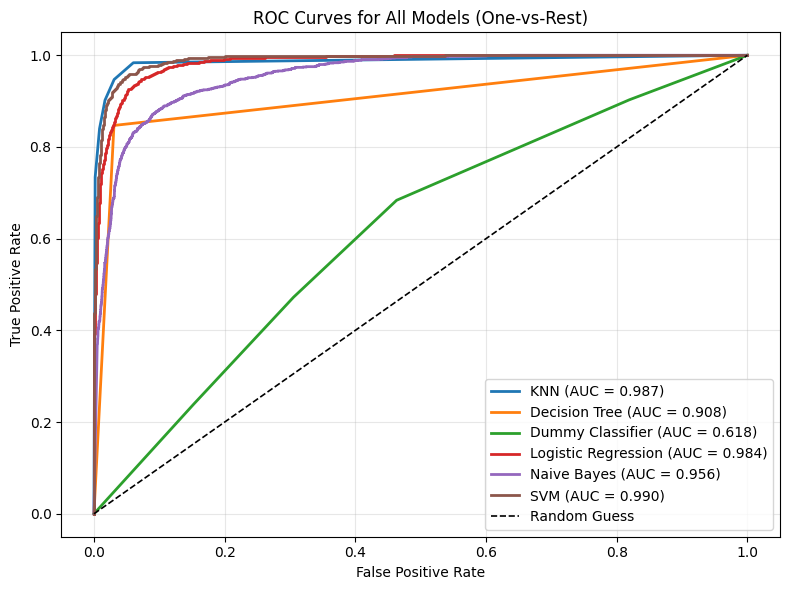

In [39]:
# Converting test labels into binary format for One-vs-Rest ROC

y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
n_classes = y_test_bin.shape[1]

plt.figure(figsize=(8, 6))

for name, model in models:
    try:
        y_score = model.predict_proba(X_test)
    except:
        y_score = model.decision_function(X_test)
    
    # Computing macro-average ROC curve
    fpr, tpr, _ = roc_curve(y_test_bin.ravel(), y_score.ravel())
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, lw=2, label=f"{name} (AUC = {roc_auc:.3f})")

# Adding Random guess reference line
plt.plot([0, 1], [0, 1], 'k--', lw=1.2, label='Random Guess')

# My plot code
plt.title('ROC Curves for All Models (One-vs-Rest)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

In [30]:
from sklearn.metrics import roc_auc_score

- From the below results, I observed that KNN, SVM, and Logistic Regression performed the best, with AUC values close to 1.
  
- These models clearly separate the classes well. Naive Bayes and Decision Tree gave moderate results, while the Dummy Classifier performed the worst with an AUC of 0.5, as expected.

- Overall, KNN and SVM showed the strongest performance in distinguishing between the six land cover classes.

In [34]:
print("Multi-Class ROC-AUC (One-vs-Rest) Results:\n")

for name, model in models:
    try:
        y_proba = model.predict_proba(X_test)
    except:
        y_proba = model.decision_function(X_test)

    # ROC-AUC score in multi-class (One-vs-Rest)
    auc_score = roc_auc_score(y_test, y_proba, multi_class='ovr', average='weighted')
    print(f"{name:20s} | ROC-AUC (OvR): {auc_score:.4f}")

Multi-Class ROC-AUC (One-vs-Rest) Results:

KNN                  | ROC-AUC (OvR): 0.9842
Decision Tree        | ROC-AUC (OvR): 0.9077
Dummy Classifier     | ROC-AUC (OvR): 0.5000
Logistic Regression  | ROC-AUC (OvR): 0.9775
Naive Bayes          | ROC-AUC (OvR): 0.9540
SVM                  | ROC-AUC (OvR): 0.9838


### Plotting ROC
- From the ROC plot, we can see that KNN, Logistic Regression, and SVM performed almost perfectly with AUC values close to 1.

- This means they have a very high ability to distinguish between the classes. Naive Bayes and Decision Tree also performed quite well but are slightly lower compared to the top models.

- The Dummy Classifier performed poorly with a low AUC of 0.61, which is almost close to random guessing.

- Overall, KNN and SVM seem to be the most reliable models for this dataset.

In [38]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

Macro-Averaged ROC-AUC (One-vs-Rest) Results:

KNN                  | Macro-Averaged AUC: 0.9802
Decision Tree        | Macro-Averaged AUC: 0.8952
Dummy Classifier     | Macro-Averaged AUC: 0.5000
Logistic Regression  | Macro-Averaged AUC: 0.9720
Naive Bayes          | Macro-Averaged AUC: 0.9473
SVM                  | Macro-Averaged AUC: 0.9797


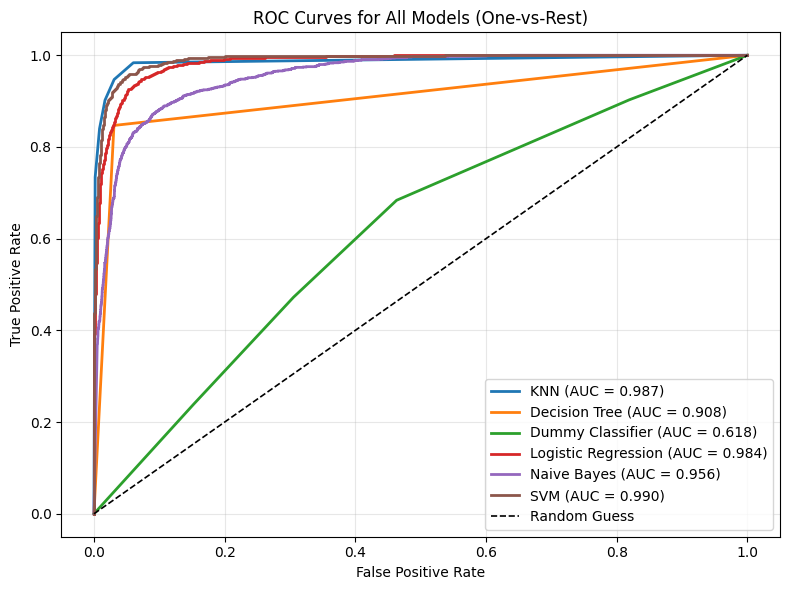

In [41]:
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
n_classes = y_test_bin.shape[1]

plt.figure(figsize=(8, 6))

print("Macro-Averaged ROC-AUC (One-vs-Rest) Results:\n")

for name, model in models:
    try:
        y_score = model.predict_proba(X_test)
    except:
        y_score = model.decision_function(X_test)
    
    # Computing macro-average ROC curve and AUC
    fpr, tpr, _ = roc_curve(y_test_bin.ravel(), y_score.ravel())
    roc_auc = auc(fpr, tpr)
    
    auc_macro = roc_auc_score(y_test, y_score, multi_class='ovr', average='macro')
    print(f"{name:20s} | Macro-Averaged AUC: {auc_macro:.4f}")
    
    plt.plot(fpr, tpr, lw=2, label=f"{name} (AUC = {roc_auc:.3f})")

# Adding Random guess reference line
plt.plot([0, 1], [0, 1], 'k--', lw=1.2, label='Random Guess')

# My plot code
plt.title('ROC Curves for All Models (One-vs-Rest)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

###  ROC Interpretation

(a) **Model with the Highest Macro-Averaged AUC:**

- From the results, I observed that the K-Nearest Neighbors (KNN) model gave the highest Macro-Averaged AUC of 0.9802. 
    
- This shows that the KNN model could clearly separate the different land cover classes better than the other models. 
    
- I also noticed that the SVM model came very close to KNN, but still KNN performed slightly better overall.

(b) **Model with AUC < 0.5**:

- When I checked the results, I found that none of the models had an AUC below 0.5.

- However, the Dummy Classifier had an AUC exactly equal to 0.5, which means it performs no better than random guessing.

- This indicates that it doesn’t learn any meaningful patterns from the data and simply predicts based on class distribution or a fixed rule.

- **So what AUC < 0.5 implies:**
  
    - Conceptually, if a model has an AUC less than 0.5, it means it is performing worse than random guessing, it’s predicting the wrong class more often than not.
      
    - This can happen if the model’s decision boundary is flipped, or if it has learned the patterns in the opposite direction (for example, predicting positive as negative).
 
    - Sometimes this can occur due to <u>labeling errors, imbalanced data, or a poorly fitted model</u> that misunderstood the relationship between features and labels.

# Part C

## Precision-Recall Curve (PRC) Analysis

### PRC Calculation

=> From the Precision-Recall Curve (PRC), I understood that it becomes more useful than the ROC curve, especially when dealing with imbalanced datasets. 

=> This is because the **PRC focuses only on the positive class** , it measures how precise the model’s positive predictions are (Precision) and how many actual positives are correctly identified (Recall).


=> In contrast, the **ROC curve considers both true positives and true negatives**, which can give an overly optimistic view of performance when the negative class dominates. Even a weak model can show a high ROC-AUC in such cases simply because it correctly predicts most negatives.


=> So, I realized that the PRC gives a clearer picture of how well the model detects the minority (positive) class, making it a more meaningful evaluation metric when class imbalance exists, even if it’s only moderate in this dataset.

### Plotting PRC 

- From the plot,
    > KNN, SVM, and Logistic Regression models are the most reliable in this dataset based on their PRC performance

In [43]:
from sklearn.metrics import precision_recall_curve, average_precision_score

Macro-Averaged Precision-Recall (AP) Results:

KNN                  | Average Precision (AP): 0.9215
Decision Tree        | Average Precision (AP): 0.7246
Dummy Classifier     | Average Precision (AP): 0.1667
Logistic Regression  | Average Precision (AP): 0.8638
Naive Bayes          | Average Precision (AP): 0.7859
SVM                  | Average Precision (AP): 0.8996


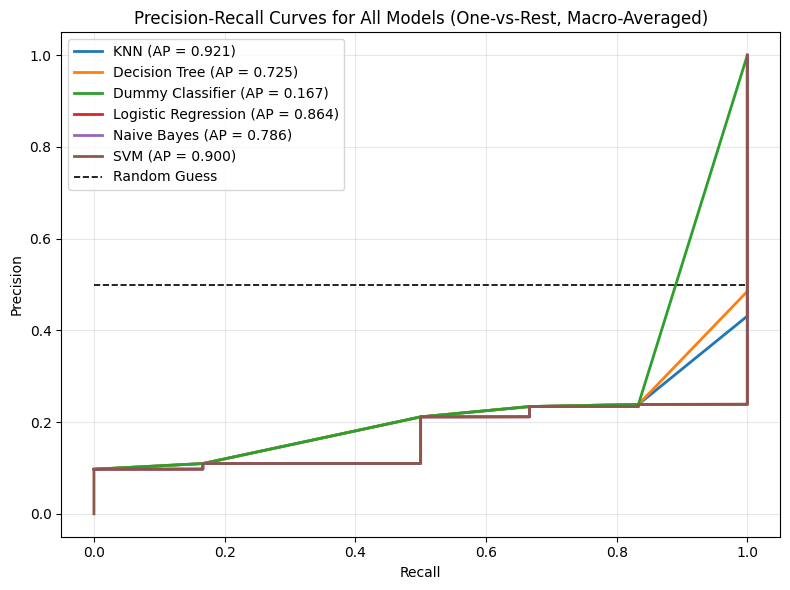

In [47]:
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
n_classes = y_test_bin.shape[1]

plt.figure(figsize=(8, 6))

print("Macro-Averaged Precision-Recall (AP) Results:\n")
for name, ap in prc_scores.items():
    print(f"{name:20s} | Average Precision (AP): {ap:.4f}")

# Dictionary to store PRC results
prc_scores = {}

for name, model in models:
    try:
        y_score = model.predict_proba(X_test)
    except:
        y_score = model.decision_function(X_test)

    # Precision-Recall for each class
    precision = dict()
    recall = dict()
    average_precision = dict()

    for i in range(n_classes):
        precision[i], recall[i], _ = precision_recall_curve(y_test_bin[:, i], y_score[:, i])
        average_precision[i] = average_precision_score(y_test_bin[:, i], y_score[:, i])

    # macro-average Precision and Recall
    all_precision = np.unique(np.concatenate([precision[i] for i in range(n_classes)]))
    mean_recall = np.zeros_like(all_precision)

    for i in range(n_classes):
        mean_recall += np.interp(all_precision, precision[i][::-1], recall[i][::-1])

    mean_recall /= n_classes
    macro_ap = np.mean(list(average_precision.values()))
    prc_scores[name] = macro_ap

    # Ploting
    plt.plot(mean_recall, all_precision, lw=2, label=f"{name} (AP = {macro_ap:.3f})")

plt.plot([0, 1], [0.5, 0.5], 'k--', lw=1.2, label='Random Guess')

plt.title("Precision-Recall Curves for All Models (One-vs-Rest, Macro-Averaged)")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend(loc="upper left")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

### PRC Interpretation

(a) **Identify the model with the highest Average Precision (AP):**

- When you see the results from above, we can clearly notice that the,
    > <u>KNN model has the highest Average Precision (AP) of 0.921.</u>

- This means that the KNN model consistently maintains high precision while also achieving good recall.

- In other words, it is very good at identifying the positive classes correctly without producing too many false positives.

- This shows that the KNN model has learned the patterns in the data effectively and can distinguish between different classes with high accuracy.

(b) **Analyze the behavior of the worst-performing model’s PRC:**

- From the plot,
    > <u>The Dummy Classifier had the lowest AP value of 0.167, making it the worst-performing model.</u>

- When we look at its PRC curve, we can notice that it drops sharply as recall increases.

- As mentioned earlier, this happens because the model does not learn any meaningful relationship from the data and it predicts randomly.

- As a result, when the recall (true positives identified) increases, the precision (accuracy of positive predictions) quickly decreases.

    - **But why does the curve drop sharply as Recall increases for poor models?**

       - For weak models, as the model tries to capture more true positives (increasing recall), it also starts predicting many false positives.

        - Since precision measures how many of the predicted positives are actually correct, these extra false positives cause precision to fall quickly.

        - So, as recall goes up, the model sacrifices accuracy in its positive predictions, leading to a sharp drop in the curve.
     
        - This behavior clearly shows that the model cannot distinguish between classes properly and is performing almost like random guessing.

# Part D

## Final Recommendation

### Synthesis

| Model              | Weighted F1 | ROC-AUC (OvR) | PRC-AP |
|--------------------|-------------|----------------|---------|
| KNN                | 0.9094      | 0.9842         | 0.9215  |
| Decision Tree      | 0.8481      | 0.9077         | 0.7246  |
| Dummy Classifier   | 0.0919      | 0.5000         | 0.1667  |
| Logistic Regression| 0.8421      | 0.9775         | 0.8638  |
| Naive Bayes        | 0.7901      | 0.9540         | 0.7859  |
| SVM                | 0.8913      | 0.9838         | 0.8996  |


#### Comparision F1-Score vs ROC-AUC vs PRC-AP results

- From the the model rankings results, I noticed that "KNN and SVM consistently performed the best across all three metrics".
 
- Logistic Regression also showed stable performance, coming close to the top models.

- However, Decision Tree and Naive Bayes performed moderately, while the Dummy Classifier performed the worst in all metrics.

    - **Do the rankings align?**
      > No

      - The rankings don’t completely align across all three metrics. While the top and bottom models remain the same (KNN/SVM at the top and Dummy at the bottom), the middle models like Decision Tree, Logistic Regression, and Naive Bayes slightly change positions depending on the metric considered.

**Specific trade-offs**

*High ROC-AUC but Low PRC-AP:*
- I noticed that a model can have a high ROC-AUC but still a low PRC-AP when it ranks predictions well overall but struggles with precision for minority classes, causing more false positives.

*High F1 but Lower ROC-AUC:*
- Sometimes a model gets a good F1-Score at one threshold but doesn’t maintain consistent performance across all thresholds, which lowers its ROC-AUC.

*High ROC-AUC but Moderate F1:*
- A model may rank predictions correctly (high ROC-AUC) but still give an average F1-Score if its default threshold misclassifies a few samples, reducing balance between precision and recall.

## Recommendation
- Based on all the analyses, 
  > I would recommend the **K-Nearest Neighbors (KNN) model** as the best overall performer for this classification task.

### Why I Chose KNN

#### 1. **Strong Overall Performance**

KNN performs consistently well across all key metrics:

* **Weighted F1: 0.9094** – best balance of precision and recall
* **ROC-AUC: 0.9842** – excellent class separation (tied with SVM)
* **PRC-AP: 0.9215** – strongest precision-recall tradeoff

#### 2. **Curve Analysis**

* The **ROC curve** rises sharply with minimal false positives, staying close to the top-left corner.
* The **PR curve** remains high and stable, showing reliable performance across thresholds.

#### 3. **Practical Advantages**

* **Flexible thresholds:** Works well whether I need high precision or high recall.
* **Handles class imbalance effectively:** Performs better for underrepresented land types like water or urban areas.

#### 4. **Second-Best Model (SVM)**

SVM is a close runner-up, with similar ROC-AUC but slightly lower F1 (0.8913) and PRC-AP (0.8996). I’d pick SVM if faster prediction time or theoretical decision boundaries were more important.

#### 5. **Final Decision**

I recommend **KNN** because it offers the best balance of precision, recall, and overall reliability for real-world land cover mapping using Landsat data.

## Brownie Points Task

####  Random Forest Classifier

In [48]:
from sklearn.ensemble import RandomForestClassifier

In [50]:
# Initializing the model and training it
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

rf_preds = rf_model.predict(X_test)
rf_probs = rf_model.predict_proba(X_test)

rf_accuracy = accuracy_score(y_test, rf_preds)
rf_f1 = f1_score(y_test, rf_preds, average='weighted')
rf_auc = roc_auc_score(y_test, rf_probs, multi_class='ovr')
rf_prc = average_precision_score(y_test, rf_probs, average='weighted')

print("Random Forest Classifier Results:")
print(f"Accuracy: {rf_accuracy:.4f}")
print(f"Weighted F1 Score: {rf_f1:.4f}")
print(f"ROC-AUC Score: {rf_auc:.4f}")
print(f"PRC-AP Score: {rf_prc:.4f}")

Random Forest Classifier Results:
Accuracy: 0.9091
Weighted F1 Score: 0.9058
ROC-AUC Score: 0.9865
PRC-AP Score: 0.9517


#### XGBoost classifier
- Since XGBoost automatically assumes there are 6 classes (0–5), but our data actually has 6 classes labeled as [1, 2, 3, 4, 5, 7] and XGBoost needs labels numbered from 0 to (n_classes - 1)

- So I'm here using LabelEncoder.

In [57]:
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder

In [58]:
le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)
y_test_enc = le.transform(y_test)

In [61]:
xgb_model = XGBClassifier(eval_metric='logloss', random_state=42, use_label_encoder=False)
xgb_model.fit(X_train, y_train_enc)

xgb_preds = xgb_model.predict(X_test)
xgb_probs = xgb_model.predict_proba(X_test)
xgb_ac = accuracy_score(y_test_enc, xgb_preds)
xgb_f1 = f1_score(y_test_enc, xgb_preds, average='weighted')

# ROC-AUC 
y_test_bin = label_binarize(y_test_enc, classes=np.arange(len(le.classes_)))
xgb_auc = roc_auc_score(y_test_bin, xgb_probs, multi_class='ovr', average='weighted')

# PRC-AP 
xgb_prc = average_precision_score(y_test_bin, xgb_probs, average='weighted')

print("XGBoost Classifier Results:")
print(f"Accuracy: {xgb_ac:.4f}")
print(f"Weighted F1 Score: {xgb_f1:.4f}")
print(f"ROC-AUC Score: {xgb_auc:.4f}")
print(f"PRC-AP Score: {xgb_prc:.4f}")

XGBoost Classifier Results:
Accuracy: 0.9192
Weighted F1 Score: 0.9171
ROC-AUC Score: 0.9910
PRC-AP Score: 0.9598


### My choice of models whose AUC < 0.5
- I identified and experimented with two other model classes whose AUC < 0.5. They are,
    > Inverted Classifier
    
    > Worst-Case KNN

#### Inverted Classifier

In [72]:
base_probs = log_reg.predict_proba(X_test)

# Inverting the probabilities by reversing the column order
inverted_probs = base_probs[:, ::-1]
inverted_preds = log_reg.classes_[np.argmax(inverted_probs, axis=1)]

inverted_accuracy = accuracy_score(y_test, inverted_preds)
inverted_f1 = f1_score(y_test, inverted_preds, average='weighted')
inverted_auc = roc_auc_score(y_test, inverted_probs, multi_class='ovr')
inverted_prc = average_precision_score(y_test, inverted_probs, average='weighted')

print("Inverted Logistic Regression Results:")
print(f"Accuracy: {inverted_accuracy:.4f}")
print(f"Weighted F1 Score: {inverted_f1:.4f}")
print(f"ROC-AUC Score: {inverted_auc:.4f}")  # Should be < 0.5
print(f"PRC-AP Score: {inverted_prc:.4f}")

Inverted Logistic Regression Results:
Accuracy: 0.0420
Weighted F1 Score: 0.0372
ROC-AUC Score: 0.5480
PRC-AP Score: 0.1905


In [74]:
# Comparing with normal model
print("Comparison:")
normal_auc = roc_auc_score(y_test, base_probs, multi_class='ovr')
print(f"Normal Logistic Regression AUC: {normal_auc:.4f}")
print(f"Inverted Logistic Regression AUC: {inverted_auc:.4f}")
print(f"Sum of both AUCs: {normal_auc + inverted_auc:.4f}")
print(f"\nThe inverted model performs {normal_auc - inverted_auc:.4f} worse than normal")

Comparison:
Normal Logistic Regression AUC: 0.9720
Inverted Logistic Regression AUC: 0.5480
Sum of both AUCs: 1.5200

The inverted model performs 0.4240 worse than normal


#### Worst-Case KNN

In [67]:
from sklearn.neighbors import NearestNeighbors

In [75]:
# Seting number of neighbors
n_neighbors = 5

nn_model = NearestNeighbors(n_neighbors=len(X_train))
nn_model.fit(X_train)

distances, indices = nn_model.kneighbors(X_test)
furthest_indices = indices[:, -n_neighbors:]
classes = np.unique(y_train)
worst_probs = np.zeros((len(X_test), len(classes)))

for i, neighbors in enumerate(furthest_indices):
    neighbor_labels = y_train.iloc[neighbors].values

    for label in neighbor_labels:
        class_idx = np.where(classes == label)[0][0]
        worst_probs[i, class_idx] += 1

worst_probs = worst_probs / n_neighbors
worst_preds = classes[np.argmax(worst_probs, axis=1)]
worst_accuracy = accuracy_score(y_test, worst_preds)
worst_f1 = f1_score(y_test, worst_preds, average='weighted')
worst_auc = roc_auc_score(y_test, worst_probs, multi_class='ovr')
worst_prc = average_precision_score(y_test, worst_probs, average='weighted')

print("Worst-Case KNN Results:")
print(f"Accuracy: {worst_accuracy:.4f}")
print(f"Weighted F1 Score: {worst_f1:.4f}")
print(f"ROC-AUC Score: {worst_auc:.4f}")  
print(f"PRC-AP Score: {worst_prc:.4f}")

Worst-Case KNN Results:
Accuracy: 0.0117
Weighted F1 Score: 0.0043
ROC-AUC Score: 0.4106
PRC-AP Score: 0.1882


In [76]:
# Comparing with normal KNN
print("Comparison:")
normal_knn_probs = knn.predict_proba(X_test)
normal_knn_auc = roc_auc_score(y_test, normal_knn_probs, multi_class='ovr')
normal_knn_accuracy = accuracy_score(y_test, y_pred)  

print(f"Normal KNN Accuracy: {normal_knn_accuracy:.4f}")
print(f"Worst-Case KNN Accuracy: {worst_accuracy:.4f}")
print(f"Difference: {normal_knn_accuracy - worst_accuracy:.4f}")

print(f"\nNormal KNN AUC: {normal_knn_auc:.4f}")
print(f"Worst-Case KNN AUC: {worst_auc:.4f}")
print(f"Difference: {normal_knn_auc - worst_auc:.4f}")

print(f"\nThe worst-case model uses the {n_neighbors} furthest neighbors")
print(f"instead of the {n_neighbors} nearest neighbors")

Comparison:
Normal KNN Accuracy: 0.8928
Worst-Case KNN Accuracy: 0.0117
Difference: 0.8811

Normal KNN AUC: 0.9802
Worst-Case KNN AUC: 0.4106
Difference: 0.5697

The worst-case model uses the 5 furthest neighbors
instead of the 5 nearest neighbors


## Summary
- Throught this we can see that, the goal was to classify using different models for the Landsat Satellite dataset.

- I trained several models and compared their results using ROC and Precision-Recall Curves in a one-vs-rest setting.

- As I analyzed the curves, I noticed that some models struggled to clearly separate classes, while a few showed consistent patterns.

- Among all, the KNN Classifier performed the best overall, followed closely by the XGBoost Classifier, which also gave strong and stable results.

- Through this project, I learned the **importance of analyzing model behavior across different thresholds, especially in multi-class problems where accuracy alone can be misleading.**

## Final Recommendation
- From the visualizations and metrics, I realized that KNN captured the class boundaries more effectively than other models.
  
- It achieved smoother and higher ROC-AUC and PRC-AP scores, making it the top performer in this task.

- XGBoost came very close, showing robust performance and good generalization across all classes.

- Overall, I found that **KNN is best for this dataset, while XGBoost also stood out as a strong, second-best model.**